# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [ ]:
# From data prespective, the idea is to come up with price of the used cars based on various attributes such as model, year, make, mileage, condition
# and location. The goal is to provide the most influential variables contributing to the price variation by applying various regression techniques.
# This involves collecting and preprocessing relevant data,perform exploratory data analysis and train supervised learning models to quantiy and interpret
# models.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
### IMPORT: ------------------------------------
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
from scipy.stats import skew
plt.style.use('ggplot')
import missingno as msno # to get visualization on missing values
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data_path = 'data/vehicles.csv'
df = pd.read_csv(data_path, index_col=0)
cars = df.copy()
print(f' There are {cars.shape[0]} rows and {cars.shape[1]} columns')

 There are 426880 rows and 17 columns


In [ ]:
cars.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
cars['region'].value_counts()

,count
region,
columbus,3608
jacksonville,3562
spokane / coeur d'alene,2988
eugene,2985
fresno / madera,2983
...,...
meridian,28
southwest MS,14
kansas city,11


In [ ]:
print("Rows : ", cars.shape[0])
print("Columns : ", cars.shape[1])
print("\nFeatures : \n", cars.columns.tolist())
print("\nMissing values :  ", cars.isnull().sum().values.sum())
print("\nUnique values :  \n", cars.nunique())

Rows :  426880
Columns :  17

Features : 
 ['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']

Missing values :   1215152

Unique values :  
 region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memo

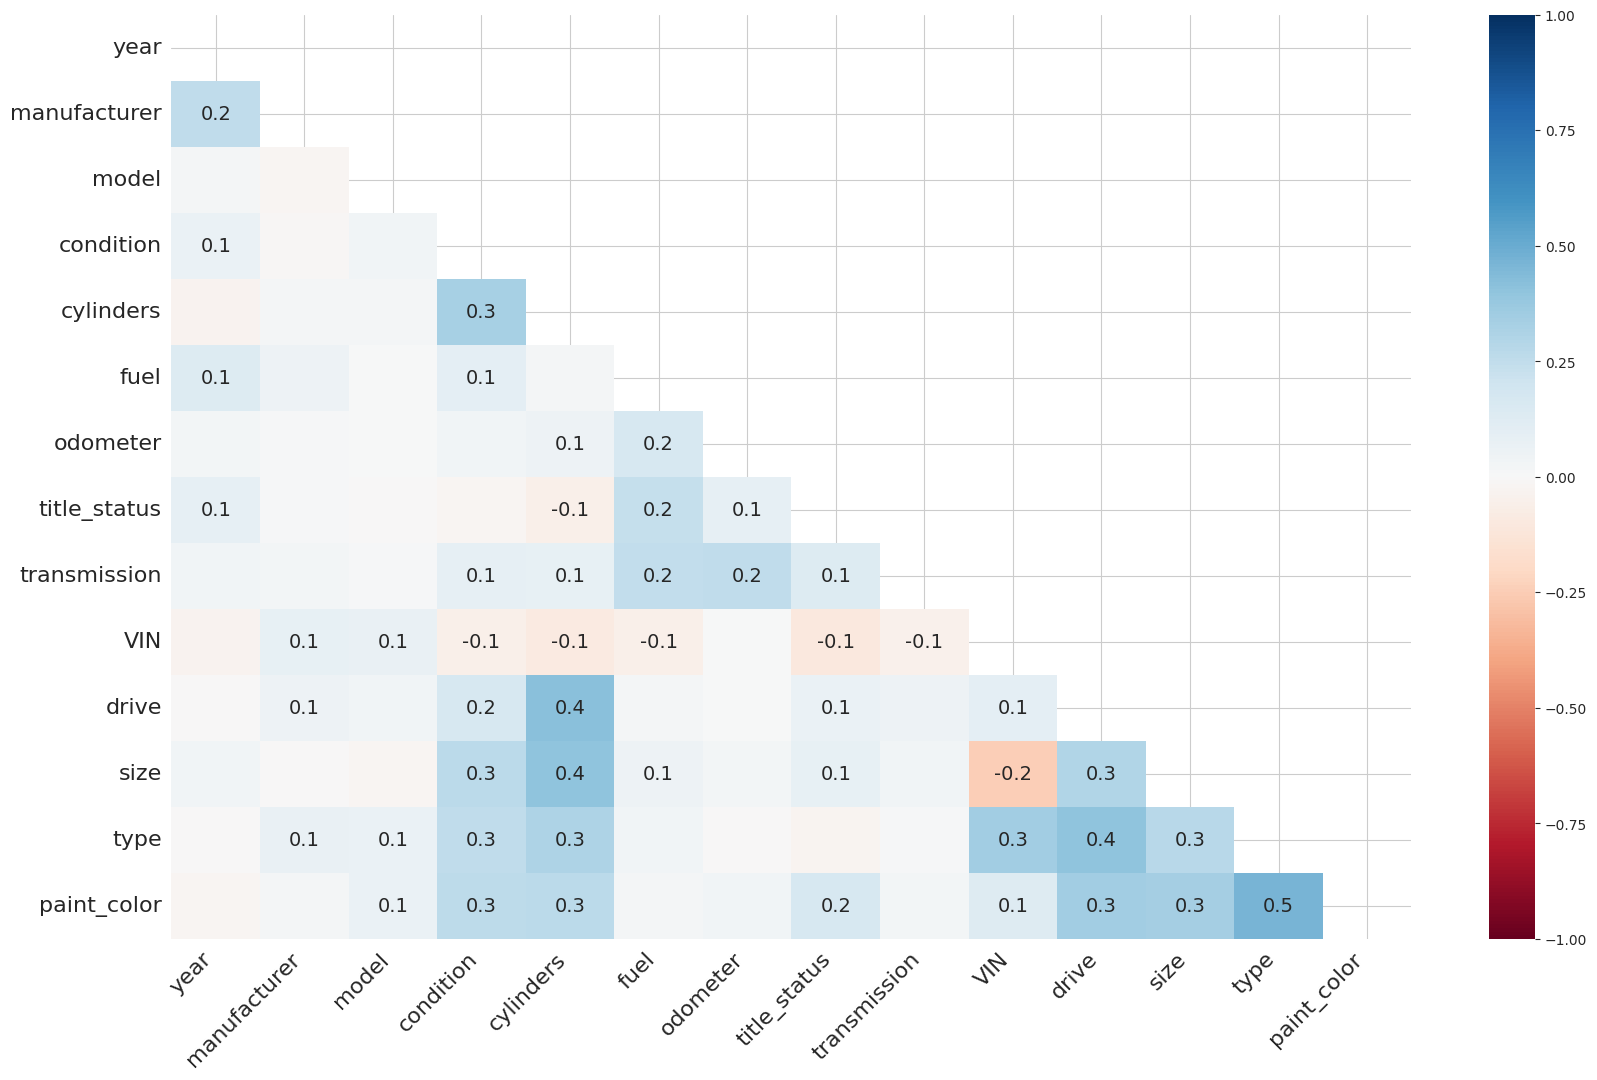

In [ ]:
# Vizualize missing values
#msno.bar(cars)

import matplotlib.pyplot as plt
import missingno as msno

sns.set_style("whitegrid")
msno.heatmap(cars)
plt.show()

In [ ]:
# Observations. Total of 426880
# Year has 425675 values. It has 1205 missing values
# Condition has 252776 values. It has 174104 missing values 40% values are missing.
# Cylinder has 249202 values. It has 177678 missing values 41% missing values
# Fuel has 423867 values. It has 3013 missing values 0.75% missing values.
# Odometer has 422480 values. It has 4400 missing values 1.03% missing values.
# tire status has 418638 values. It has 8242 missing values 1.93% missing values.
# transmission has 424324 values. It has 2556 missing values 0.59% missing values.
# VIN has 265838 values. It has 161042 missing values 37.72% missing values.
# Drive has 296313 values. It has 130567 missing values 30.58% missing values.
# Size has 120519 values. It has 306361 missing values 71.76% missing values.
# Type has 334022 values. It has 92858 missing values 21.72% missing values.
# Paint color has 296677 values. It has 130203 missing values 30.50 missing values.
# State has no missing values

In [ ]:
print(cars['state'].isnull().sum())

0


In [ ]:
cars.isnull().sum()

,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400
title_status,8242


In [ ]:
# drop columns that are too sparse
cars.drop(['VIN',  'size', 'region','model'], axis=1, inplace=True)

In [ ]:
# Fill categorical columns with Mode or unknown
categorical_columns = [ 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
for col in categorical_columns:
    cars[col].fillna(cars[col].fillna('Unknown'), inplace=True)

In [ ]:
# Fill numerical columns with Median or Flag
cars['year'] = pd.to_numeric(cars['year'], errors='coerce')
cars['odometer'] = pd.to_numeric(cars['odometer'], errors='coerce')
cars['year'].fillna(cars['year'].median(), inplace=True)
cars['odometer'].fillna(cars['odometer'].median(), inplace=True)


In [ ]:
cars.head(5)
cars.tail(5)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
id,,,,,,,,,,,,,
7301591192,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,Unknown,wy
7301591187,30590,2020.0,volvo,good,Unknown,gas,12029.0,clean,other,fwd,sedan,red,wy
7301591147,34990,2020.0,cadillac,good,Unknown,diesel,4174.0,clean,other,Unknown,hatchback,white,wy
7301591140,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy
7301591129,30590,2019.0,bmw,good,Unknown,gas,22716.0,clean,other,rwd,coupe,Unknown,wy


In [ ]:
cars.isnull().sum()

,0
price,0
year,0
manufacturer,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0
transmission,0
drive,0


In [ ]:
# Drop thw row where price is null and state is null
cars.dropna(subset=['price'], inplace=True)
cars.dropna(subset=['state'], inplace=True)

In [ ]:
# replace missing year values with the most common year value.
cars['year'] = pd.to_numeric(cars['year'], errors='coerce')
cars['year'] = cars['year'].fillna(cars['year'].mode()[0])

In [ ]:
cars.isnull().sum()

,0
price,0
year,0
manufacturer,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0
transmission,0
drive,0


In [ ]:
# Make list of categorical variables and find unique value in each column
categorical_columns = ['manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

for column in categorical_columns:
    count_values = cars[column].value_counts()
    print(f"Unique values in column " + column + ":")
    print(count_values)
    print("-------------------------------------")





Unique values in column manufacturer:
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
Unknown            17646
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          426880 non-null  float64
 2   manufacturer  426880 non-null  object 
 3   condition     426880 non-null  object 
 4   cylinders     426880 non-null  object 
 5   fuel          426880 non-null  object 
 6   odometer      426880 non-null  float64
 7   title_status  426880 non-null  object 
 8   transmission  426880 non-null  object 
 9   drive         426880 non-null  object 
 10  type          426880 non-null  object 
 11  paint_color   426880 non-null  object 
 12  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 45.6+ MB


In [ ]:
# Converting datatypes
cars['fuel'] = cars['fuel'].astype('category')
cars['transmission'] = cars['transmission'].astype('category')
cars['drive'] = cars['drive'].astype('category')


In [ ]:
# Is car a luxury brand
cars.info()
luxury_brands = ['manufacturer_bmw', 'manufacturer_mercedes-benz', 'manufacturer_audi', 'manufacturer_lexus', 'manufacturer_cadillac']
existing_luxury_dummies = [col for col in luxury_brands if col in cars.columns]
cars['is_luxury'] = cars[existing_luxury_dummies].sum(axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         426880 non-null  int64   
 1   year          426880 non-null  float64 
 2   manufacturer  426880 non-null  object  
 3   condition     426880 non-null  object  
 4   cylinders     426880 non-null  object  
 5   fuel          426880 non-null  category
 6   odometer      426880 non-null  float64 
 7   title_status  426880 non-null  object  
 8   transmission  426880 non-null  category
 9   drive         426880 non-null  category
 10  type          426880 non-null  object  
 11  paint_color   426880 non-null  object  
 12  state         426880 non-null  object  
dtypes: category(3), float64(2), int64(1), object(7)
memory usage: 37.0+ MB


In [ ]:
cars.describe()

,price,year,odometer,is_luxury
count,4.268800e+05,426880.000000,4.268800e+05,426880.0
mean,7.519903e+04,2011.240173,9.791454e+04,0.0
std,1.218228e+07,9.439234,2.127801e+05,0.0
min,0.000000e+00,1900.000000,0.000000e+00,0.0
25%,5.900000e+03,2008.000000,3.813000e+04,0.0
50%,1.395000e+04,2013.000000,8.554800e+04,0.0
75%,2.648575e+04,2017.000000,1.330000e+05,0.0
max,3.736929e+09,2022.000000,1.000000e+07,0.0


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         426880 non-null  int64   
 1   year          426880 non-null  float64 
 2   manufacturer  426880 non-null  object  
 3   condition     426880 non-null  object  
 4   cylinders     426880 non-null  object  
 5   fuel          426880 non-null  category
 6   odometer      426880 non-null  float64 
 7   title_status  426880 non-null  object  
 8   transmission  426880 non-null  category
 9   drive         426880 non-null  category
 10  type          426880 non-null  object  
 11  paint_color   426880 non-null  object  
 12  state         426880 non-null  object  
 13  is_luxury     426880 non-null  float64 
dtypes: category(3), float64(3), int64(1), object(7)
memory usage: 40.3+ MB


In [ ]:
cars.tail(2)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,is_luxury
id,,,,,,,,,,,,,,
7301591140,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,0.0
7301591129,30590,2019.0,bmw,good,Unknown,gas,22716.0,clean,other,rwd,coupe,Unknown,wy,0.0


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
# Encoding of data
top_makes = cars['manufacturer'].value_counts().nlargest(25).index
cars['manufacturer'] = cars['manufacturer'].where(cars['manufacturer'].isin(top_makes), 'Other')

# Extract Cylinder number
cars['cylinders'] = cars['cylinders'].str.extract('(\d+)').astype(float)
cars['cylinders'] = cars['cylinders'].fillna(0)

# Drop columns
cars.drop(['state'], axis=1, inplace=True)




In [ ]:
# Convert odometer to numeric
cars['odometer'] = pd.to_numeric(cars['odometer'], errors='coerce')

In [ ]:
# One hot encoding of selected categorical columns
categorical_columns = ['manufacturer', 'condition', 'fuel',  'title_status', 'transmission', 'drive', 'type', 'paint_color']
cars = pd.get_dummies(cars, columns=categorical_columns, drop_first=True)

In [ ]:
cars.shape

(426880, 78)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 78 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   price                       426880 non-null  int64  
 1   year                        426880 non-null  float64
 2   cylinders                   426880 non-null  float64
 3   odometer                    426880 non-null  float64
 4   is_luxury                   426880 non-null  float64
 5   manufacturer_Unknown        426880 non-null  bool   
 6   manufacturer_acura          426880 non-null  bool   
 7   manufacturer_audi           426880 non-null  bool   
 8   manufacturer_bmw            426880 non-null  bool   
 9   manufacturer_buick          426880 non-null  bool   
 10  manufacturer_cadillac       426880 non-null  bool   
 11  manufacturer_chevrolet      426880 non-null  bool   
 12  manufacturer_chrysler       426880 non-null  bool   
 13  manufa

In [ ]:
cars.head(100)

,price,year,cylinders,odometer,is_luxury,manufacturer_Unknown,manufacturer_acura,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
id,,,,,,,,,,,,,,,,,,,,,
7222695916,6000,2013.0,0.0,85548.0,0.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7218891961,11900,2013.0,0.0,85548.0,0.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7221797935,21000,2013.0,0.0,85548.0,0.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7222270760,1500,2013.0,0.0,85548.0,0.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7210384030,4900,2013.0,0.0,85548.0,0.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7309798041,2100,2006.0,4.0,97000.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7309361405,80,2004.0,6.0,94020.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7309271279,15990,2016.0,0.0,29652.0,0.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Drop column outliers
valid_price_mask = (cars['price'] >= 1000) & (cars['price'] <= 100000)
cars = cars[valid_price_mask]

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
# Add new features
# Add new features
cars['car_age'] = 2025 - cars['year']
odometer_median = cars['odometer'].median()
cars['high_mileage'] = cars['odometer'].apply(lambda x: 1 if x > odometer_median else 0)


In [ ]:
X = cars.drop('price', axis=1)
y = cars['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.reset_index()
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (303928, 79)
X_test: (75982, 79)
y_train: (303928,)
y_test: (75982,)


In [ ]:
# Apply log transformation to the target
import numpy as np
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [ ]:
# Standardise features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train_log)
y_pred = linear_reg.predict(X_test_scaled)
print("Accuracy on Training set: ", linear_reg.score(X_train_scaled, y_train_log))
print("Accuracy on Test set: ", linear_reg.score(X_test_scaled, y_test_log))

Accuracy on Training set:  0.5909574609793653
Accuracy on Test set:  0.5953172052589859


In [ ]:
# Find low correlation columns and drop them
correlations = pd.DataFrame(X_train_scaled, columns=X_train.columns).corrwith(y_train_log).abs()
low_corr_cols = correlations[correlations < 0.01].index.tolist()
print(low_corr_cols)


[]


In [42]:
# Try Polynomial Features on selected data set as it cannot run on all the various attributes
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Your existing code for polynomial features
selected_features = ['year', 'cylinders', 'title_status_clean','odometer', 'high_mileage']  # example

# Get column indices for selected features
cols_idx = [X_train.columns.get_loc(f) for f in selected_features]

X_train_selected = X_train_scaled[:, cols_idx]
X_test_selected = X_test_scaled[:, cols_idx]

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Fit model
linear_reg.fit(X_train_poly, y_train_log)
y_pred_log = linear_reg.predict(X_test_poly)

# Convert predictions and true values back from log scale
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test_log)

# Calculate accuracy metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Looks like R2 is 0.3559 which means it explains 35.6% of the car prices. My linear regression model performs better.

R² Score: 0.3559
MAE: 7644.13
RMSE: 11529.63


In [43]:
# Try Regularization: Ridge/Lasso

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_log)
y_pred = ridge.predict(X_test_scaled)
print("R2 Ridge: ", r2_score(y_test_log, y_pred))



R2 Ridge:  0.5953172368920556


In [44]:
# Looks like Linear Regression and Ridge doesn't go ore than 59%. Let's give a shot to Tree based models.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train model
rf = RandomForestRegressor(n_estimators=20, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train_log)

# Predict
y_pred_log_rf = rf.predict(X_test_scaled)
y_pred_rf = np.expm1(y_pred_log_rf)  # Undo log
y_true_rf = np.expm1(y_test_log)

# Evaluate
print("📊 Random Forest:")
print("R²:", r2_score(y_true_rf, y_pred_rf))
print("MAE:", mean_absolute_error(y_true_rf, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_true_rf, y_pred_rf)))

# Looks like Random forest is doing great with 89% explaining for the variance in car prices

📊 Random Forest:
R²: 0.8932498499117605
MAE: 2061.768190881027
RMSE: 4693.761404094


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

1. Review Business Objective: Help car dealer understand what makes car more or less expensive.
Address: Our model can predict with 89% accuracy.

2. Identify key drivers of price:
year
cylinders
title_status_clean
odometer
high_mileage'


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Report:-
We built a predictive model to estimate used car prices and uncover which factors most influence value. Our best model (Random Forest) predicts prices with ~89% accuracy, with an average error of just ~$2,000. We identified key features like age, mileage, brand, and vehicle type as top price drivers. These insights can help dealers optimize pricing and stocking decisions.

Model Summary:-
R²: 0.89

MAE: $2060

RMSE: $4700